<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Deep Learning NLP Project - SMS Spam Classification</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2022-DL-NLP-SMS-Spam-Classification/blob/SMART_Street/project_logo.png?raw=true"></center>

----
### **Table of Content**
----

**1**. [**Introduction**](#section1)<br>
  - **1.1** [**Problem Statement**](#section11)<br>
  - **1.2** [**Importing Libraries**](#section12)<br>
  
**2**. [**The Dataset**](#section2)<br>
  - **2.1** [**Load Dataset**](#section21)<br>
  - **2.2** [**Data Description**](#section22)<br>
  - **2.3** [**Dataset Structure**](#section23)<br>
  
**3**. [**Data Pre-Processing**](#section3)<br>
  - **3.1** [**Data Pre-Profiling**](#section31)<br>
  - **3.2** [**Data Pre-Processing**](#section32)<br>
  - **3.3** [**Data Post-Profiling**](#section33)<br>
  
**4**. [**Exploratory Data Analysis**](#section4)<br>

**5**. [**Data Post-Processing**](#section5)<br>
  - **5.1** [**Data Encoding**](#section51)<br>
  - **5.2** [**Data Preparation**](#section52)<br>
  - **5.3** [**Data Scaling**](#section53)<br>

**6**. [**Model Development & Evaluation**](#section6)<br>
  - **6.1** [**Build the Model**](#section61)<br>
  - **6.2** [**Inspect the Model**](#section62)<br>


<a name=section1></a>

----
## **1. Introduction**
----

- Your client for this project is a cyber-consulting company.
    - They ensure the best cyber security consulting experience for their consumers
    - Nowadays they are receiving a ton of requests and complaints regarding SMS spamming
    - Many of the consumers have complained that they have faced severe financial issues because of this

**<h3>Current Scenario:</h3>**

- The company is going through a tough time dealing with the current spamming issue and at any cost, they want to deliver a high-quality consumer experience to its customers
- Hence, they are willing to build an SMS Spam classification system that can tell if an SMS should be marked spammed or not.
- For this reason, they want to depend on AI as they want high accuracy which is not practically possible for a human to deliver.
- Hence, they have outsourced this project to you as a Freelance NLP Engineer and they expect you to deliver this project with the best model possible.

---
<a name = section11></a>
### **1.1 Problem Statement**
---

- **The current process suffers from the following problems:**
    - Currently, consumers are facing the issue of SMS spamming.
    - Because of this issue, they are facing a bulk amount of financial loss.
    - In order to encounter this challenge the company wants to make an SMS spam classification system that can say if an SMS received is marked spam or not.


### **Your Role**

- You are given a dataset containing text of SMS.

- Your task is to build a classification model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

### **Project Deliverables**
- Deliverable: **Predict whether SMS is Spam or not.**

- Machine Learning Task: **Text Classification**

- Target Variable: **label**

### **Evaluation Metric**

- The model evaluation will be based on the Accuracy score.

<center><img src="https://github.com/girishksahu/INSAID2022-DL-NLP-SMS-Spam-Classification/blob/SMART_Street/sms_spam.png?raw=true" width="500" /></center>

---
<a name = section12></a>
### **1.2 Importing Libraries**
---

In [1]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-l3ilwwew
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-l3ilwwew
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=179891 sha256=10a49e6c570918cfbc3517a94ca68c749fc458176c6f2fd1a4dbd00fab3c5cf1
  Stored in directory: /tmp/pip-ephem-wheel-cache-uvscmdvw/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [2]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 8.2 MB/s 


In [3]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression   
# Importing WordCloud for text data visualization
from wordcloud import WordCloud

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV                    # To tune the models   

In [4]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [6]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<a name=section2></a>

----
## **2. The Dataset**
----

- The Train dataset contains text of SMS.


| Records | Features|
| :-- | :-- |
| 4458 | 3 |
<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Id**   | Unique identifier of the SMS       |
|02| **Text**   | Text in SMS                  |
|03| **label** | if the Text is labelled as Spam or not             |


- The **Test dataset** contains text document with real and fake articles and **Label** column value need to be predicted.

| Records | Features |
| :-- | :-- |
| 1116 | 2 | 

<br>


<a name=section21></a>

### **2.1 Load Dataset**

- Load dataset and check shape of dataset.

In [8]:
# Load train dataset
train_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-NLP-SMS-Spam-Classification/SMART_Street/spam_train.csv",index_col='Id',engine='python')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', train_df.shape)
# Get the structure of data
train_df.info()
# Output first 10 data rows
train_df.head(10)


Shape of the Training and Validation dataset: (4457, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4457 entries, 1978 to 860
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4457 non-null   object
 1   label   4457 non-null   object
dtypes: object(2)
memory usage: 104.5+ KB


,text,label
Id,,
1978,No I'm in the same boat. Still here at my moms...,ham
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,spam
3935,They r giving a second chance to rahul dengra.,ham
4078,O i played smash bros &lt;#&gt; religiously.,ham
4086,PRIVATE! Your 2003 Account Statement for 07973...,spam
4919,"G says you never answer your texts, confirm/deny",ham
2268,88066 FROM 88066 LOST 3POUND HELP,spam
4696,"Okey dokey, iÛ÷ll be over in a bit just sorti...",ham
3653,Why i come in between you people,ham


In [ ]:
# Check for any missing values
any(train_df.isna().sum())

False

In [ ]:
#check if any duplicate row
any(train_df.duplicated())

True

In [35]:
# Load test dataset
test_df_temp = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-NLP-SMS-Spam-Classification/SMART_Street/spam_test.csv")

test_df = test_df_temp[['Id','text']]
test_df.set_index('Id', inplace=True)
# Get the dimesions of data
print('Shape of Test dataset:', test_df.shape)
# Get the structure of data
test_df.info()
# Output first 10 data rows
test_df.head(10)

Shape of Test dataset: (1115, 1)
<class 'pandas.core.frame.DataFrame'>
Index: 1115 entries, 3245 to 4293
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1114 non-null   object
dtypes: object(1)
memory usage: 17.4+ KB


,text
Id,
3245,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,I sent my scores to sophas and i had to do sec...
1044,We know someone who you know that fancies you....
2484,Only if you promise your getting out as SOON a...
812,Congratulations ur awarded either å£500 of CD ...
2973,"I'll text carlos and let you know, hang on"
2991,K.i did't see you.:)k:)where are you now?
2942,No message..no responce..what happend?
230,Get down in gandhipuram and walk to cross cut ...


In [ ]:
# Check for any missing values
any(test_df.isna().sum())

False

In [ ]:
#check if any duplicate row
any(test_df.duplicated())

True

<a name=section22></a>

### **2.2 Data Description**

- Get **information about the data** and capture observations.

In [ ]:
#Basic statistical details for numeric variables
#train_df.describe(include=[np.float64]).transpose()

**Observations:**
- NA

In [ ]:
#Basic statistical details for numeric variables
#train_df.describe(include=[np.int64]).transpose()

**Observations:**
- NA

In [ ]:
#Basic statistical details for categorical variables
train_df.describe(include=[object]).transpose()

,count,unique,top,freq
text,4457,4190,"Sorry, I'll call later",22
label,4457,2,ham,3860


<a name=section23></a>

### **2.3 Dataset Structure**

- Get **information about the dataset structure** and capture observations.

In [ ]:
# display summary of dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4457 entries, 1978 to 860
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4457 non-null   object
 1   label   4457 non-null   object
dtypes: object(2)
memory usage: 104.5+ KB


In [ ]:
# Columns list can be handy and useful for further steps
train_df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
# Get list of categorical variables
s = (train_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['text', 'label']


In [ ]:
# Get list of numerical variables
s = (train_df.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
[]


In [ ]:
# Get list of numerical variables
s = (train_df.dtypes == 'int64')
numeric_int_cols = list(s[s].index)

print("Numeric variables Int:")
print(numeric_int_cols)

Numeric variables Int:
[]


<a name = section3></a>

---
# **3. Data Pre-Processing**
---

<a name = section31></a>
### **3.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

                                             |          | [  0%]   00:00 -> (? left)


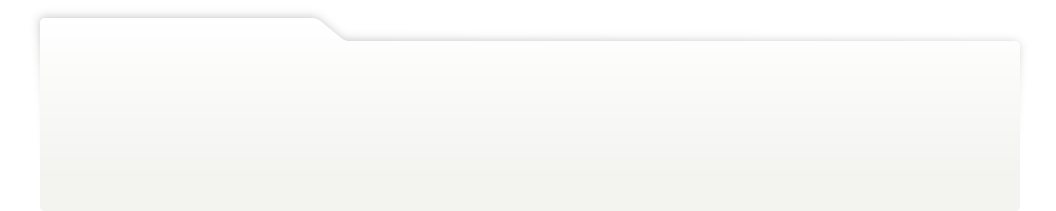
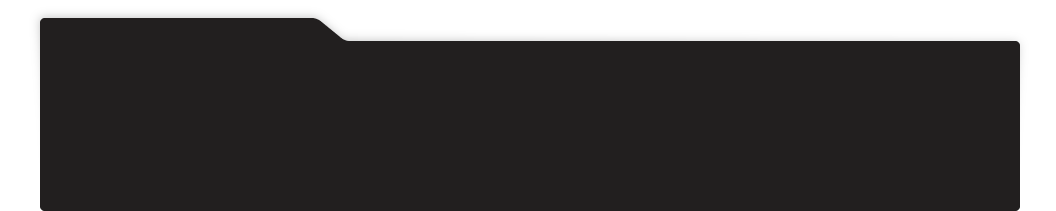
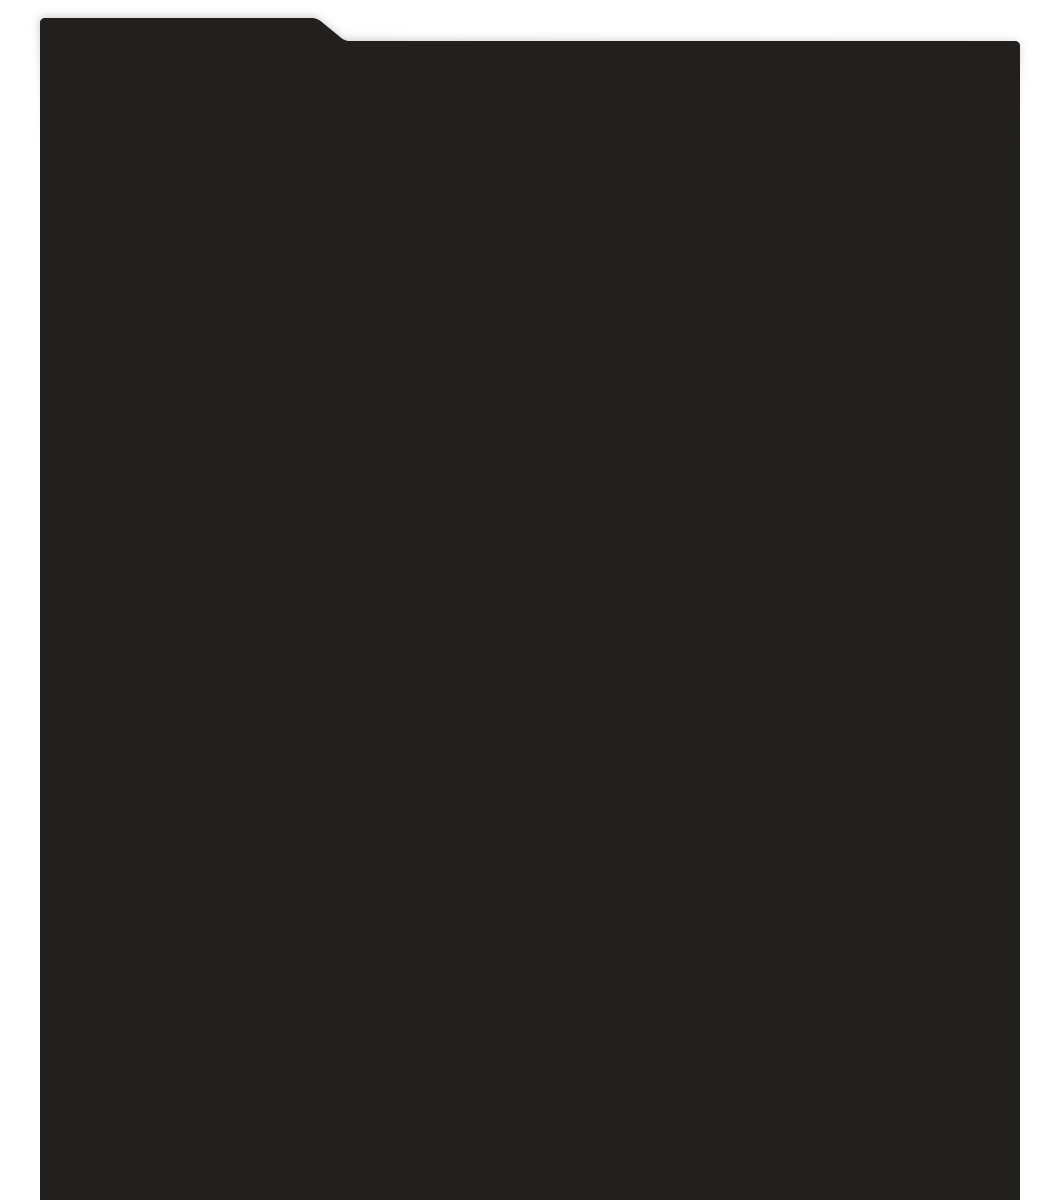
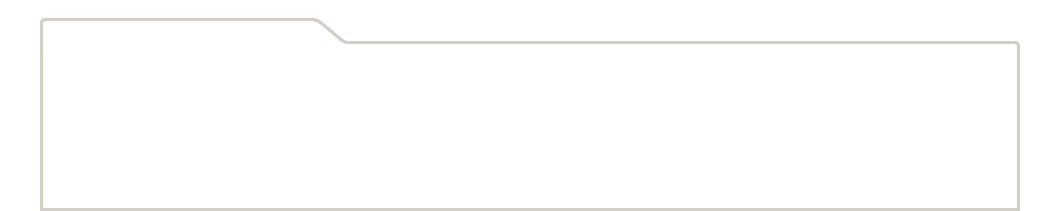
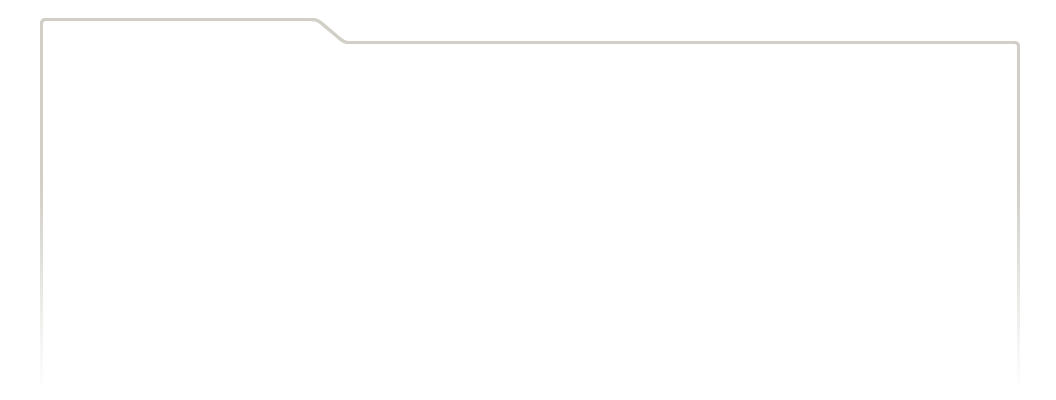
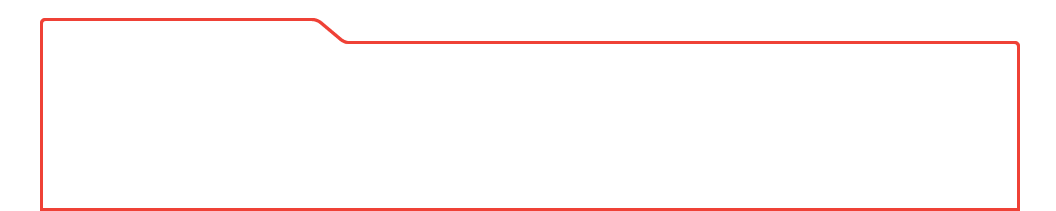
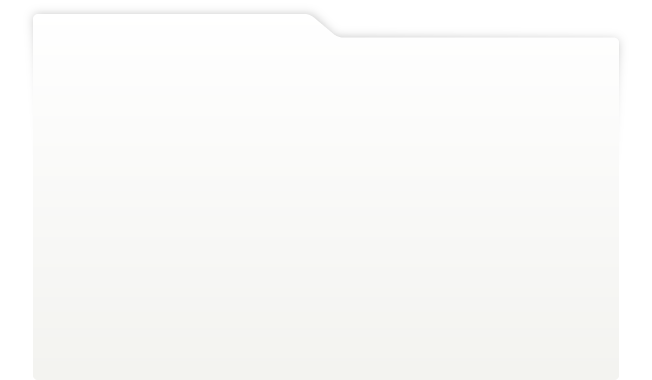
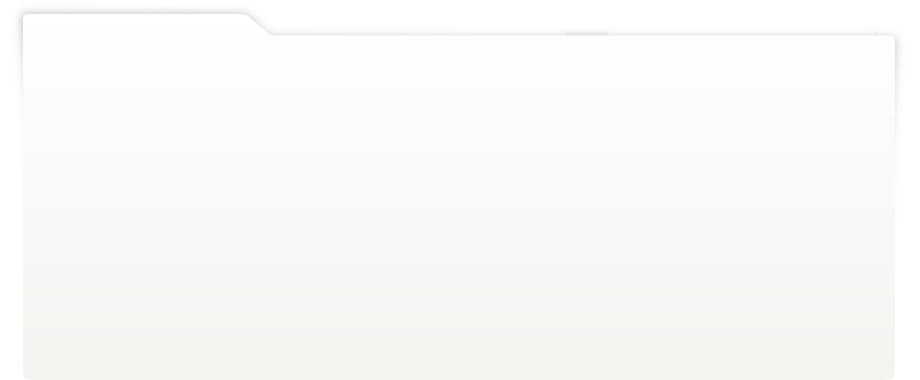
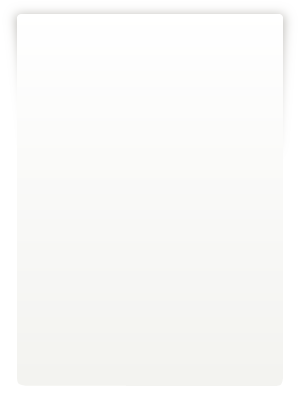
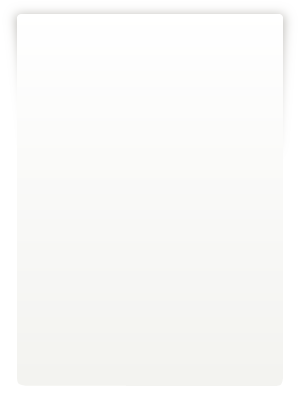
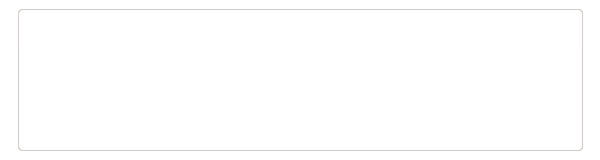
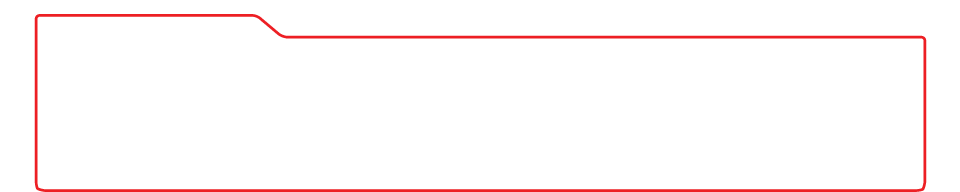
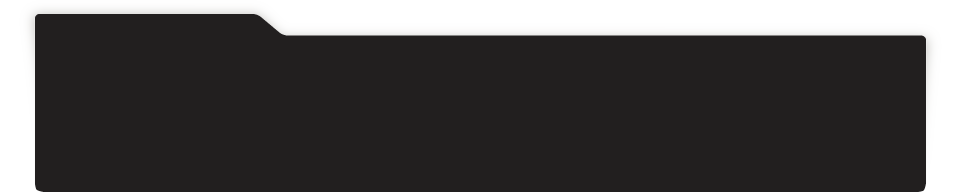
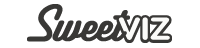
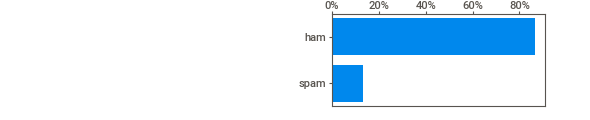
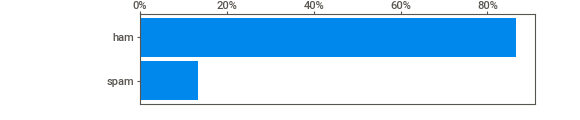
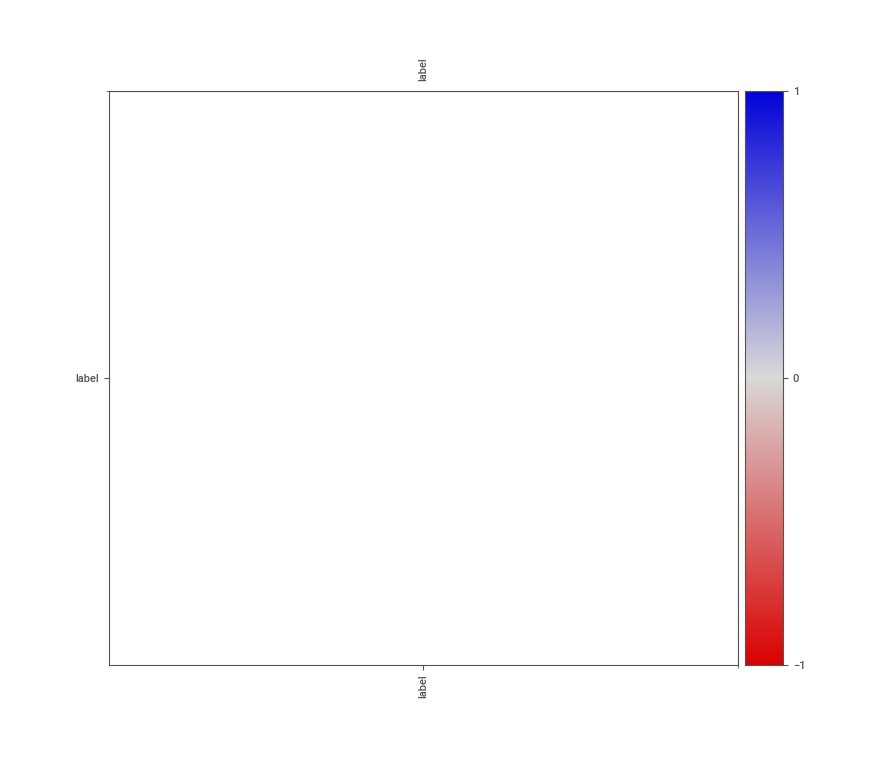
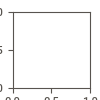

In [9]:
# profile = ProfileReport(df=train_df)
# profile.to_file(output_file='Pre_Profiling_Report.html')
# print('Accomplished!')
import sweetviz as sv
analyze_report = sv.analyze(train_df)
#analyze_report.show_html('train_df_sweetviz_report.html')
analyze_report.show_notebook()

In [ ]:
#comparison_report = sv.compare([train_df, "Train"], [test_df, "Test"], "Label")
#comparison_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html
#comparison_report.show_notebook()

<a name = section32></a>
### **3.2 Data Pre-Processing**

- We need to pre process few features before EDA and Model Evaluation as needed

In [ ]:
# display summary of dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4457 entries, 1978 to 860
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4457 non-null   object
 1   label   4457 non-null   object
dtypes: object(2)
memory usage: 104.5+ KB


<a name = section33></a>
### **3.3 Data Post-Profiling**

- We can run the pandas profiling report to get latest information

In [ ]:
# post_profile=ProfileReport(df=train_df)
# post_profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Not Applicable

<a name = section4></a>

---
# **4. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

What is the correlation between numeric variables?

In [ ]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
# corr = train_df.corr(method='pearson')
# plt.figure(figsize=(15,15))
# sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
# plt.title('Correlation between Numerical features')

**Observations:**

- TBD

What is the relationship between numeric variables?

In [ ]:
# plot pairwise relationship in a dataset
# plt.figure(figsize=(50,25))
# sns.pairplot(data=train_df,palette='rainbow',diag_kind='kde')
# plt.show()

**Observations:**

- TBD

In [ ]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
train_df.cov()

""


<a name = section5></a>

---
# **5. Data Post-Processing**
---


<a name = section51></a>
### **5.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and drop any column as necessary

In [10]:
y = train_df['label']

In [11]:
# Encode for string labels
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

In [24]:
train_df['label_encoded'] = y

In [25]:
train_df.head()

,text,label,label_encoded
Id,,,
1978,No I'm in the same boat. Still here at my moms...,ham,0
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,spam,1
3935,They r giving a second chance to rahul dengra.,ham,0
4078,O i played smash bros &lt;#&gt; religiously.,ham,0
4086,PRIVATE! Your 2003 Account Statement for 07973...,spam,1


In [12]:
# Get the news from the text column
sentences = train_df['text'].tolist()
labels = y.tolist()

In [39]:
test_sentences = (test_df['text'].astype(str)).tolist()

<a name = section52></a>
### **5.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [13]:
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

<a name = section53></a>
### **5.3 Data Scaling**

- Using Tokenizer for Training Dataset

In [40]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

For Test Dataset

In [42]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

test_tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
test_tokenizer.fit_on_texts(test_sentences)
test_word_index = test_tokenizer.word_index
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

<a name = section6></a>

---
# **6. Model Development & Evaluation**
---


<a name=section61></a>

### **6.1 Build the Model**

- Let's build our model.

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
%%time
num_epochs = 10
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
112/112 [==============================] - 4s 5ms/step - loss: 0.6083 - accuracy: 0.8670 - val_loss: 0.4866 - val_accuracy: 0.8621
Epoch 2/10
112/112 [==============================] - 0s 4ms/step - loss: 0.3817 - accuracy: 0.8670 - val_loss: 0.3325 - val_accuracy: 0.8621
Epoch 3/10
112/112 [==============================] - 0s 4ms/step - loss: 0.2968 - accuracy: 0.8670 - val_loss: 0.2814 - val_accuracy: 0.8621
Epoch 4/10
112/112 [==============================] - 0s 4ms/step - loss: 0.2451 - accuracy: 0.8670 - val_loss: 0.2287 - val_accuracy: 0.8621
Epoch 5/10
112/112 [==============================] - 0s 4ms/step - loss: 0.1970 - accuracy: 0.8971 - val_loss: 0.1860 - val_accuracy: 0.9350
Epoch 6/10
112/112 [==============================] - 0s 4ms/step - loss: 0.1558 - accuracy: 0.9518 - val_loss: 0.1488 - val_accuracy: 0.9552
Epoch 7/10
112/112 [==============================] - 0s 4ms/step - loss: 0.1220 - accuracy: 0.9663 - val_loss: 0.1214 - val_accuracy: 0.9664
Epoch 

<a name=section62></a>

### **6.2 Inspect the Model**

- Using the `.summary` method to print a simple description of the model

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


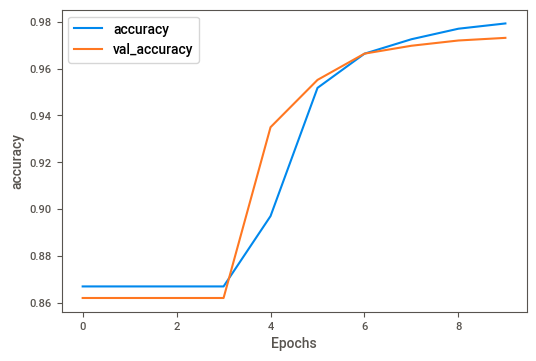

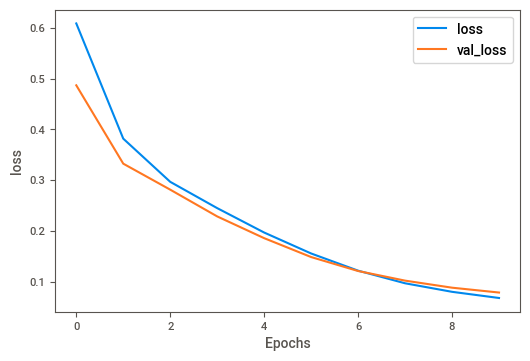

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:
# prediction on testing validation dataset
y_testing_pred = model.predict(testing_padded).flatten()

In [21]:
float(y_testing_pred[101])

0.007874426431953907

In [43]:
# prediction on test dataset
y_test_pred = model.predict(test_padded).flatten()

In [44]:
float(y_test_pred[100])

0.01877043955028057

In [45]:
# convert probabilities into encoded label
final_prediction = ['0' if float(prob) <0.9 else '1' for prob in np.ravel(y_test_pred)]

In [46]:
final_prediction[:10]

['1', '0', '0', '0', '1', '0', '0', '0', '0', '0']

In [47]:
output = pd.DataFrame({'Id': test_df.index,'label': final_prediction})
output.to_csv('sms-spam-classification-submission1.csv', index=False, header=False)

**Thank you and Happy Learning.**

---

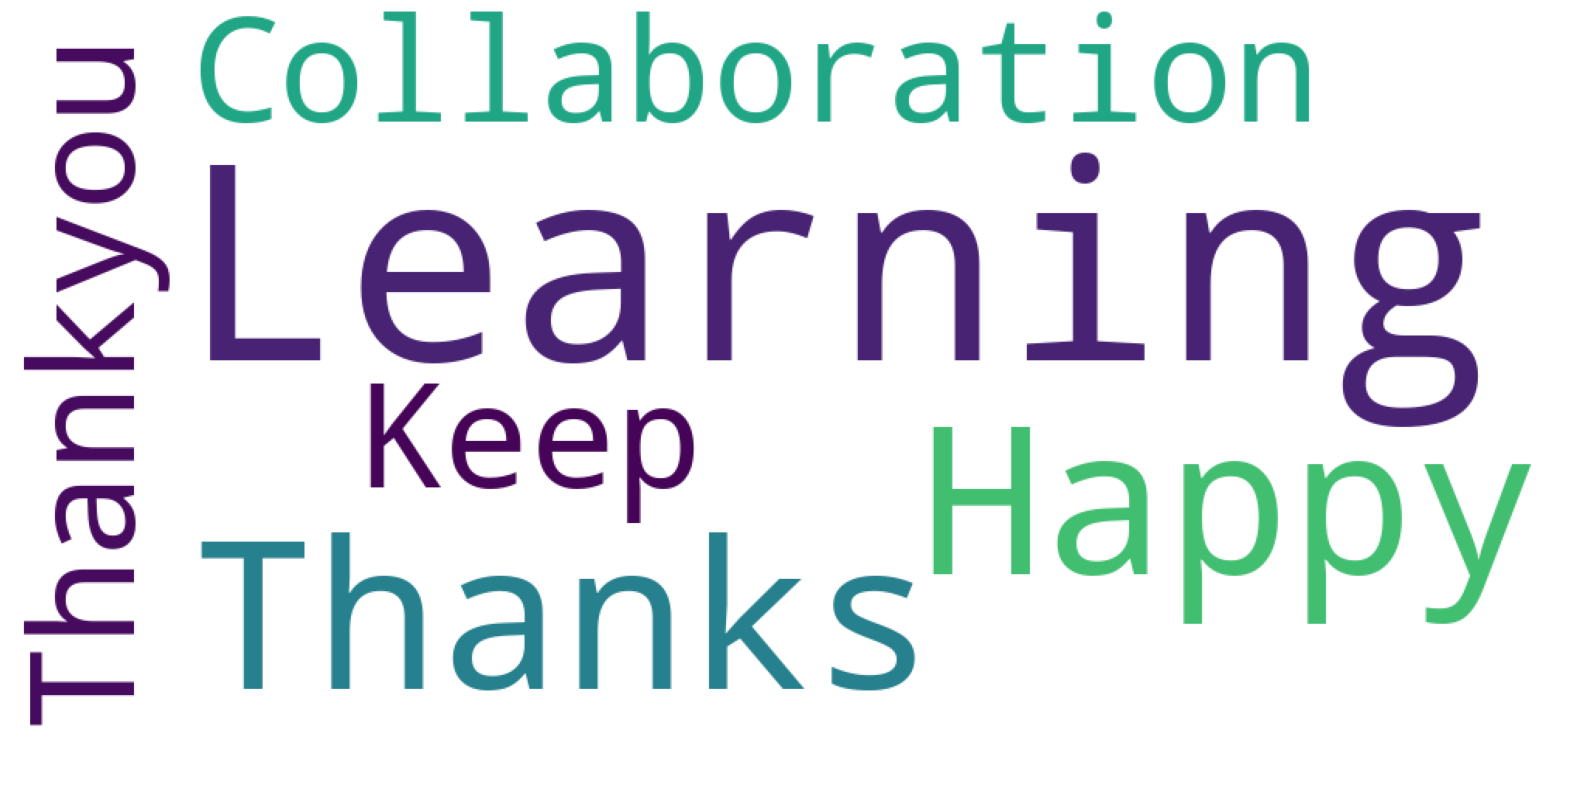

In [ ]:
thank_you_str="Thanks,Happy Learning,Collaboration,Thankyou,Keep Learning"
# create WordCloud with converted string
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=True).generate(thank_you_str)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()